# Data Loading

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thusharanair/deepfashion2-original-with-dataframes")

print("Path to dataset files:", path)

100%|██████████| 14.9G/14.9G [03:24<00:00, 78.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/thusharanair/deepfashion2-original-with-dataframes/versions/2


In [ ]:
import os

def print_folders_only(root_dir, indent=0):
    for item in sorted(os.listdir(root_dir)):
        path = os.path.join(root_dir, item)
        if os.path.isdir(path):
            print(' ' * indent + '|-- ' + item)
            print_folders_only(path, indent + 4)

dataset_path = "/root/.cache/kagglehub/datasets/thusharanair/deepfashion2-original-with-dataframes/versions/2"

print(f"Folder structure of dataset at: {dataset_path}\n")
print_folders_only(dataset_path)

Folder structure of dataset at: /root/.cache/kagglehub/datasets/thusharanair/deepfashion2-original-with-dataframes/versions/2

|-- DeepFashion2
    |-- deepfashion2_original_images
        |-- test
            |-- json_for_test
            |-- test
                |-- image
        |-- train
            |-- annos
            |-- image
        |-- validation
            |-- annos
            |-- image
            |-- json_for_validation
    |-- img_info_dataframes


In [ ]:
import os

df_dir = "/root/.cache/kagglehub/datasets/thusharanair/deepfashion2-original-with-dataframes/versions/2/DeepFashion2/img_info_dataframes"

print("Files in img_info_dataframes:")
for file in os.listdir(df_dir):
    print("-", file)

Files in img_info_dataframes:
- validation.csv
- train.csv
- test.csv


# Data Management

In [ ]:
import os
# Base directory
base_dir = "/content/deepfashion2_trousers_subset"
# Dataset names
dataset_folders = [
    "Filtered_Trousers",
    "Cleaned_trousers_dataset",
    "Preprocessed_trousers_dataset",
    "Augmented_trousers_dataset",
    "Complete_Trousers_Dataset"
]
# Dataset splits
splits = ["train", "validation", "test"]
# Subfolders per split
subfolders = {
    "train": ["image", "annos"],
    "validation": ["image", "annos"],

}

# Create folders for each dataset variation
for dataset in dataset_folders:
    dataset_path = os.path.join(base_dir, dataset)
    for split in splits:
        for subfolder in subfolders.get(split, []):
            path = os.path.join(dataset_path, split, subfolder)
            os.makedirs(path, exist_ok=True)

# Create metadata folder
dataframes_dir = os.path.join(base_dir, "img_info_dataframes")
os.makedirs(dataframes_dir, exist_ok=True)

print("Folder structure created successfully inside:", base_dir)

Folder structure created successfully inside: /content/deepfashion2_trousers_subset


In [ ]:
import os

def print_tree(startpath, indent=""):
    for item in sorted(os.listdir(startpath)):
        path = os.path.join(startpath, item)
        print(indent + "├── " + item)
        if os.path.isdir(path):
            print_tree(path, indent + "│   ")

# Set your base path here
base_path = "/content/deepfashion2_trousers_subset"

print(f"Folder structure for: {base_path}")
print_tree(base_path)

Folder structure for: /content/deepfashion2_trousers_subset
├── Augmented_trousers_dataset
│   ├── test
│   │   ├── image
│   ├── train
│   │   ├── annos
│   │   ├── image
│   ├── validation
│   │   ├── annos
│   │   ├── image
├── Cleaned_trousers_dataset
│   ├── test
│   │   ├── image
│   ├── train
│   │   ├── annos
│   │   ├── image
│   ├── validation
│   │   ├── annos
│   │   ├── image
├── Complete_Trousers_Dataset
│   ├── test
│   │   ├── image
│   ├── train
│   │   ├── annos
│   │   ├── image
│   ├── validation
│   │   ├── annos
│   │   ├── image
├── Filtered_Trousers
│   ├── test
│   │   ├── image
│   ├── train
│   │   ├── annos
│   │   ├── image
│   ├── validation
│   │   ├── annos
│   │   ├── image
├── Preprocessed_trousers_dataset
│   ├── test
│   │   ├── image
│   ├── train
│   │   ├── annos
│   │   ├── image
│   ├── validation
│   │   ├── annos
│   │   ├── image
├── img_info_dataframes


# Data Handling

In [ ]:
import json
import os

dataset_root = "/root/.cache/kagglehub/datasets/thusharanair/deepfashion2-original-with-dataframes/versions/2/DeepFashion2/deepfashion2_original_images"
annos_path = os.path.join(dataset_root, "train", "annos")

# Find the first annotation with both item1 and item2
for filename in os.listdir(annos_path):
    path = os.path.join(annos_path, filename)
    with open(path, "r") as f:
        anno = json.load(f)
        if "item1" in anno and "item2" in anno:
            print("Found annotation with both item1 and item2:", filename)
            break

print("Keys in annotation JSON:", anno.keys())
print("\nSample of the JSON content:")
import pprint
pprint.pprint(anno, depth=2, compact=True)

Found annotation with both item1 and item2: 005348.json
Keys in annotation JSON: dict_keys(['item2', 'source', 'pair_id', 'item1'])

Sample of the JSON content:
{'item1': {'bounding_box': [...],
           'category_id': 4,
           'category_name': 'long sleeve outwear',
           'landmarks': [...],
           'occlusion': 1,
           'scale': 2,
           'segmentation': [...],
           'style': 1,
           'viewpoint': 2,
           'zoom_in': 1},
 'item2': {'bounding_box': [...],
           'category_id': 8,
           'category_name': 'trousers',
           'landmarks': [...],
           'occlusion': 2,
           'scale': 1,
           'segmentation': [...],
           'style': 0,
           'viewpoint': 2,
           'zoom_in': 1},
 'pair_id': 431,
 'source': 'user'}


In [ ]:
import os
import json
import shutil
from tqdm import tqdm

# Original dataset root (source)
dataset_root = "/root/.cache/kagglehub/datasets/thusharanair/deepfashion2-original-with-dataframes/versions/2/DeepFashion2/deepfashion2_original_images"

# Output root (destination)
base_output_root = "/content/deepfashion2_trousers_subset"
dataset_name = "Filtered_Trousers"
output_root = os.path.join(base_output_root, dataset_name)

# Only process train and validation sets
split_paths = {
    "train": {
        "annos": os.path.join(dataset_root, "train", "annos"),
        "images": os.path.join(dataset_root, "train", "image"),
    },
    "validation": {
        "annos": os.path.join(dataset_root, "validation", "annos"),
        "images": os.path.join(dataset_root, "validation", "image"),
    }
}

# Loop through each split
for split, paths in split_paths.items():
    annos_dir = paths["annos"]
    images_dir = paths["images"]

    out_images = os.path.join(output_root, split, "image")
    out_annos = os.path.join(output_root, split, "annos")
    os.makedirs(out_images, exist_ok=True)
    os.makedirs(out_annos, exist_ok=True)

    trousers_count = 0

    for anno_file in tqdm(os.listdir(annos_dir), desc=f"Filtering trousers in {split}"):
        if not anno_file.endswith(".json"):
            continue

        anno_path = os.path.join(annos_dir, anno_file)
        with open(anno_path, "r") as f:
            anno = json.load(f)

        # Check both item1 and item2
        for key in ["item1", "item2"]:
            item = anno.get(key, {})
            if item.get("category_id") == 8:  # trousers
                img_file = anno_file.replace(".json", ".jpg")
                src_img = os.path.join(images_dir, img_file)
                dst_img = os.path.join(out_images, img_file)

                # Copy image if it exists
                if os.path.exists(src_img):
                    shutil.copy(src_img, dst_img)
                else:
                    print(f"[Missing Image] Dataset: {dataset_name} | Split: {split} | Path: {src_img}")
                    continue

                # Save full original annotation (not just bbox/landmarks)
                dst_anno_path = os.path.join(out_annos, anno_file)
                with open(dst_anno_path, "w") as out_f:
                    json.dump(anno, out_f)

                trousers_count += 1
                break  # Stop after first trousers match

    print(f"{split}: Saved {trousers_count} trousers annotations + images to {dataset_name}")

Filtering trousers in train: 100%|██████████| 191961/191961 [04:27<00:00, 718.25it/s]


train: Saved 53644 trousers annotations + images to Filtered_Trousers


Filtering trousers in validation: 100%|██████████| 32153/32153 [00:45<00:00, 699.19it/s] 

validation: Saved 9118 trousers annotations + images to Filtered_Trousers


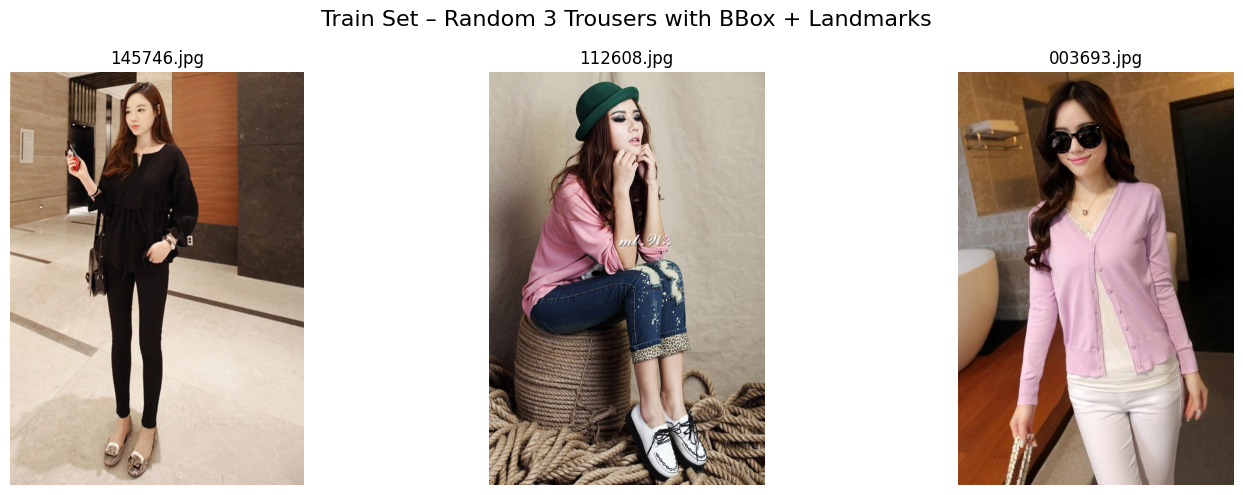

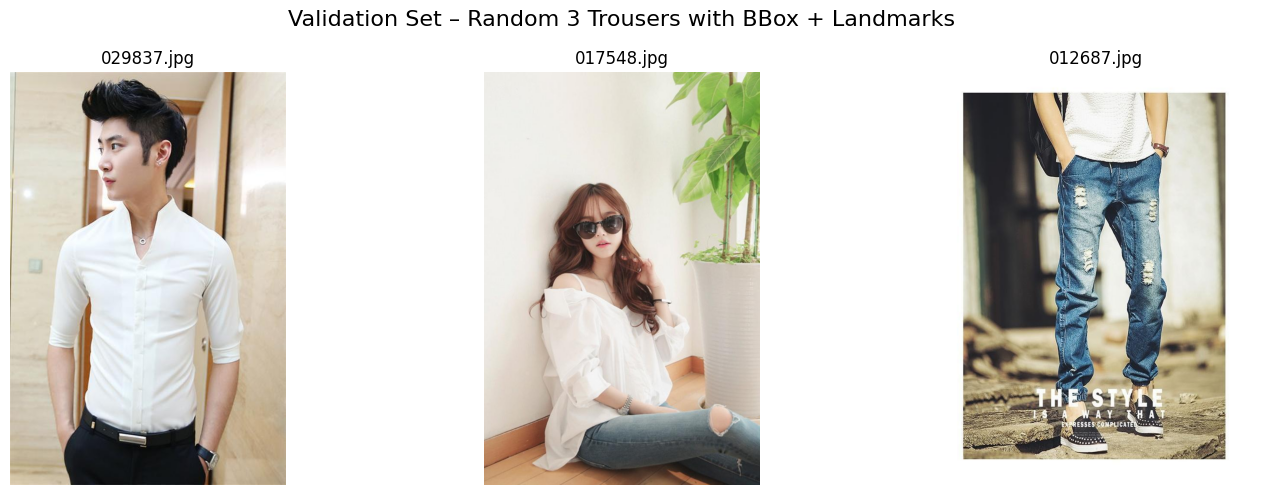

In [ ]:
import os
import json
import random
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Path to the Filtered_Trousers subset
subset_root = "/content/deepfashion2_trousers_subset/Filtered_Trousers"

def show_random_images_with_landmarks_and_bbox(split_name, num_images=5):
    image_dir = os.path.join(subset_root, split_name, "image")
    annos_dir = os.path.join(subset_root, split_name, "annos")

    # Get all annotation files
    anno_files = [f for f in os.listdir(annos_dir) if f.endswith(".json")]
    if len(anno_files) < num_images:
        print(f"Not enough annotation files in {split_name} split!")
        return

    # Randomly select annotations
    selected_annos = random.sample(anno_files, num_images)

    plt.figure(figsize=(5 * num_images, 5))
    for i, anno_file in enumerate(selected_annos):
        with open(os.path.join(annos_dir, anno_file), "r") as f:
            data = json.load(f)

        img_file = data.get("image", anno_file.replace(".json", ".jpg"))
        img_path = os.path.join(image_dir, img_file)

        if not os.path.exists(img_path):
            print(f"Image not found: {img_path}")
            continue

        image = Image.open(img_path)

        # Plot image
        ax = plt.subplot(1, num_images, i + 1)
        ax.imshow(image)
        ax.set_title(img_file)
        ax.axis("off")

        # Landmarks
        landmarks = data.get("landmarks", [])
        if landmarks:
            xs = landmarks[0::3]
            ys = landmarks[1::3]
            ax.scatter(xs, ys, c='red', s=10)

        # Bounding box
        bbox = data.get("b_box", [])
        if bbox and len(bbox) == 4:
            x1, y1, x2, y2 = bbox
            width = x2 - x1
            height = y2 - y1
            rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)

    plt.suptitle(f"{split_name.capitalize()} Set – Random {num_images} Trousers with BBox + Landmarks", fontsize=16)
    plt.tight_layout()
    plt.show()

# Display a few samples from each split
show_random_images_with_landmarks_and_bbox("train", 3)
show_random_images_with_landmarks_and_bbox("validation", 3)

# Data Cleaning

In [ ]:
import os
import json
import shutil
from tqdm import tqdm

# Root paths
dataset_root = "/content/deepfashion2_trousers_subset/Filtered_Trousers"
output_root = "/content/deepfashion2_trousers_subset/Cleaned_trousers_dataset"

# Trousers category ID based on your dataset
TROUSERS_CATEGORY_ID = 8

# Only process train and validation splits
splits = ["train", "validation"]

for split in splits:
    print(f"\nCleaning {split} set...")

    original_annos_dir = os.path.join(dataset_root, split, "annos")
    original_images_dir = os.path.join(dataset_root, split, "image")
    out_annos_dir = os.path.join(output_root, split, "annos")
    out_images_dir = os.path.join(output_root, split, "image")

    os.makedirs(out_annos_dir, exist_ok=True)
    os.makedirs(out_images_dir, exist_ok=True)

    valid_trousers_count = 0
    skipped_count = 0

    for anno_file in tqdm(os.listdir(original_annos_dir)):
        if not anno_file.endswith(".json"):
            continue

        anno_path = os.path.join(original_annos_dir, anno_file)
        with open(anno_path, 'r') as f:
            anno_data = json.load(f)

        image_name = anno_file.replace(".json", ".jpg")
        src_image_path = os.path.join(original_images_dir, image_name)
        dst_image_path = os.path.join(out_images_dir, image_name)
        out_anno_path = os.path.join(out_annos_dir, anno_file)

        found_valid = False
        for item_key in ["item1", "item2"]:
            item = anno_data.get(item_key, {})
            if item.get("category_id") != TROUSERS_CATEGORY_ID:
                continue

            # Skip occluded trousers
            if item.get("occlusion", 0) >= 2:
                continue

            bbox = item.get("bounding_box", [])
            if not bbox or len(bbox) != 4:
                continue

            x1, y1, x2, y2 = bbox
            if (x2 - x1 < 5) or (y2 - y1 < 5):
                continue

            landmarks = item.get("landmarks", [])
            if not landmarks or sum(landmarks) == 0:
                continue

            # Passed all filters — save simplified annotation
            simplified = {
                "image": image_name,
                "landmarks": landmarks,
                "b_box": bbox
            }

            with open(out_anno_path, "w") as f_out:
                json.dump(simplified, f_out)

            if os.path.exists(src_image_path):
                shutil.copy(src_image_path, dst_image_path)
                valid_trousers_count += 1
            else:
                print(f"Warning: Image not found for {image_name}")

            found_valid = True
            break  # only keep one valid trousers item per annotation file

        if not found_valid:
            skipped_count += 1

            # Remove any previously copied files for this annotation/image
            if os.path.exists(out_anno_path):
                os.remove(out_anno_path)
            if os.path.exists(dst_image_path):
                os.remove(dst_image_path)

    print(f"{split}: {valid_trousers_count} valid trousers saved, {skipped_count} skipped (cleaned).")



Cleaning train set...


100%|██████████| 53644/53644 [00:46<00:00, 1145.16it/s]


train: 11931 valid trousers saved, 41713 skipped (cleaned).

Cleaning validation set...


100%|██████████| 9118/9118 [00:03<00:00, 2282.50it/s]

validation: 1114 valid trousers saved, 8004 skipped (cleaned).


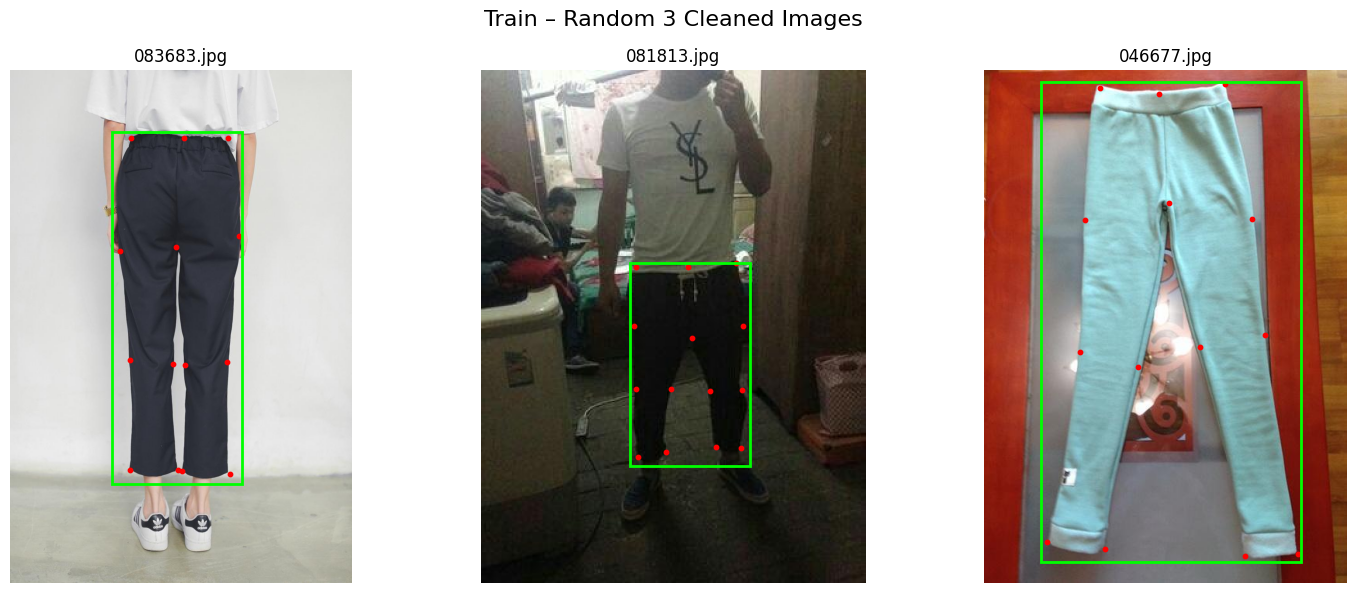

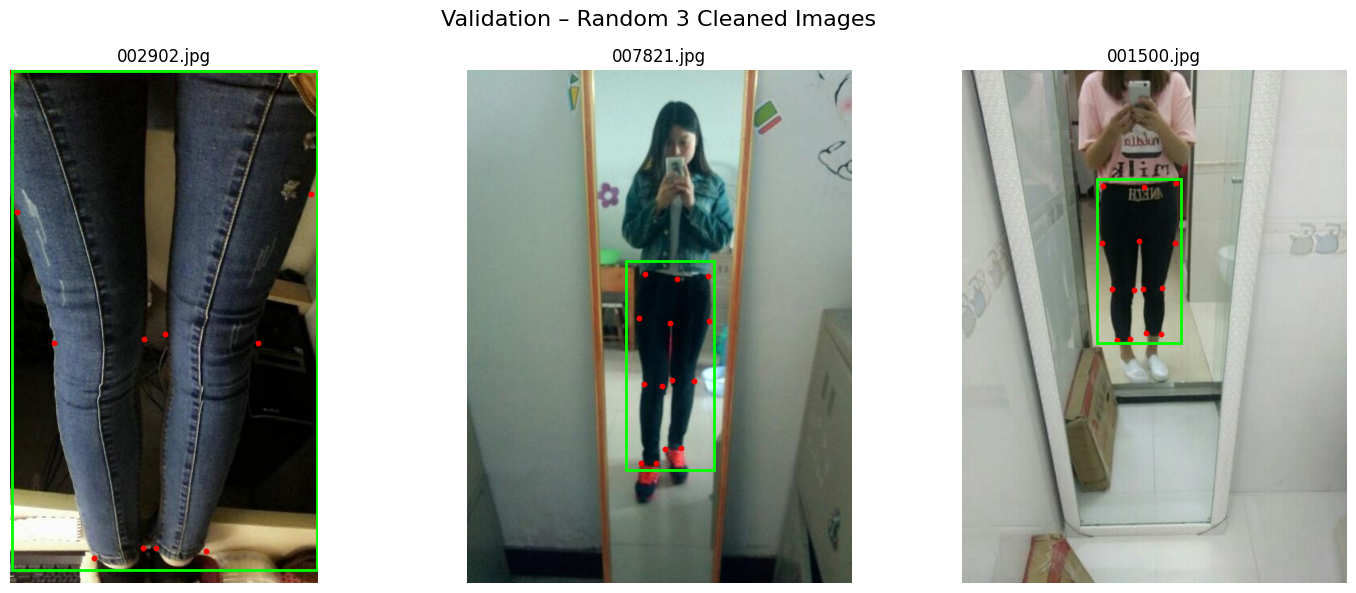

In [ ]:
import os
import json
import random
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Updated path to the cleaned/preprocessed trousers subset
subset_root = "/content/deepfashion2_trousers_subset/Cleaned_trousers_dataset"

def show_random_images_with_landmarks_and_bbox(split_name, num_images=5):
    image_dir = os.path.join(subset_root, split_name, "image")
    annos_dir = os.path.join(subset_root, split_name, "annos")

    # Get all JSON annotation files
    anno_files = [f for f in os.listdir(annos_dir) if f.endswith(".json")]
    if len(anno_files) < num_images:
        print(f"Not enough images in {split_name} split!")
        return

    # Randomly choose annotation files
    selected_annos = random.sample(anno_files, num_images)

    plt.figure(figsize=(15, 6))
    for i, anno_file in enumerate(selected_annos):
        with open(os.path.join(annos_dir, anno_file), "r") as f:
            data = json.load(f)

        img_path = os.path.join(image_dir, data["image"])
        if not os.path.exists(img_path):
            print(f"Image not found: {img_path}")
            continue

        image = Image.open(img_path)

        # Plot image
        ax = plt.subplot(1, num_images, i + 1)
        ax.imshow(image)
        ax.set_title(data["image"])
        ax.axis("off")

        # Plot landmarks (if exist)
        landmarks = data.get("landmarks", [])
        if landmarks:
            xs = landmarks[0::3]
            ys = landmarks[1::3]
            ax.scatter(xs, ys, c='red', s=10)

        # Plot bounding box
        bbox = data.get("b_box", [])
        if bbox and len(bbox) == 4:
            x1, y1, x2, y2 = bbox
            width = x2 - x1
            height = y2 - y1
            rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)

    plt.suptitle(f"{split_name.capitalize()} – Random {num_images} Cleaned Images", fontsize=16)
    plt.tight_layout()
    plt.show()

# Display random samples
show_random_images_with_landmarks_and_bbox("train", 3)
show_random_images_with_landmarks_and_bbox("validation", 3)

# Data Preprocessing

In [ ]:
import os
import cv2
import json
import numpy as np
from tqdm import tqdm

# Settings
input_root = "/content/deepfashion2_trousers_subset/Cleaned_trousers_dataset"
output_root = "/content/deepfashion2_trousers_subset/Preprocessed_trousers_dataset"
target_size = (256, 256)  # (width, height)

splits = ["train", "validation"]

def normalize_image(img):
    # Convert to float32 and normalize to [0, 1]
    return img.astype(np.float32) / 255.0

def resize_and_adjust_landmarks(img, bbox, landmarks):
    x1, y1, x2, y2 = bbox
    cropped = img[int(y1):int(y2), int(x1):int(x2)]
    orig_h, orig_w = cropped.shape[:2]
    resized = cv2.resize(cropped, target_size)
    scale_x = target_size[0] / orig_w
    scale_y = target_size[1] / orig_h
    adjusted = []
    for i in range(0, len(landmarks), 3):
        x, y, v = landmarks[i:i+3]
        if v != 0:
            x = (x - x1) * scale_x
            y = (y - y1) * scale_y
        adjusted.extend([x, y, v])
    return resized, np.array(adjusted, dtype=np.float32)

# Preprocess all data
for split in splits:
    print(f"\nProcessing {split}...")

    input_img_dir = os.path.join(input_root, split, "image")
    input_anno_dir = os.path.join(input_root, split, "annos")

    out_img_dir = os.path.join(output_root, split, "image")
    out_anno_dir = os.path.join(output_root, split, "annos")
    os.makedirs(out_img_dir, exist_ok=True)
    os.makedirs(out_anno_dir, exist_ok=True)

    for anno_file in tqdm(os.listdir(input_anno_dir)):
        if not anno_file.endswith(".json"):
            continue

        anno_path = os.path.join(input_anno_dir, anno_file)
        with open(anno_path, 'r') as f:
            data = json.load(f)

        img_path = os.path.join(input_img_dir, data["image"])
        if not os.path.exists(img_path):
            continue

        # Read image
        img = cv2.imread(img_path)
        if img is None:
            continue

        bbox = data["b_box"]
        landmarks = data["landmarks"]

        # Handle bbox to [x1, y1, x2, y2]
        if len(bbox) == 4:
            x, y, w, h = bbox
            bbox_coords = [x, y, x + w, y + h]
        else:
            continue  # skip bad bbox

        # Crop, resize, normalize, and adjust landmarks
        cropped_resized_img, adjusted_landmarks = resize_and_adjust_landmarks(img, bbox_coords, landmarks)
        normalized_img = normalize_image(cropped_resized_img)

        # Save image (uint8 PNG for now — normalize again later in training)
        output_img_path = os.path.join(out_img_dir, data["image"])
        cv2.imwrite(output_img_path, (normalized_img * 255).astype(np.uint8))

        # Save adjusted landmarks and new size
        new_anno = {
            "image": data["image"],
            "landmarks": adjusted_landmarks.tolist(),
            "size": target_size
        }

        output_anno_path = os.path.join(out_anno_dir, anno_file)
        with open(output_anno_path, "w") as f_out:
            json.dump(new_anno, f_out)


Processing train...


100%|██████████| 11931/11931 [00:54<00:00, 218.30it/s]



Processing validation...


100%|██████████| 1114/1114 [00:04<00:00, 258.72it/s]


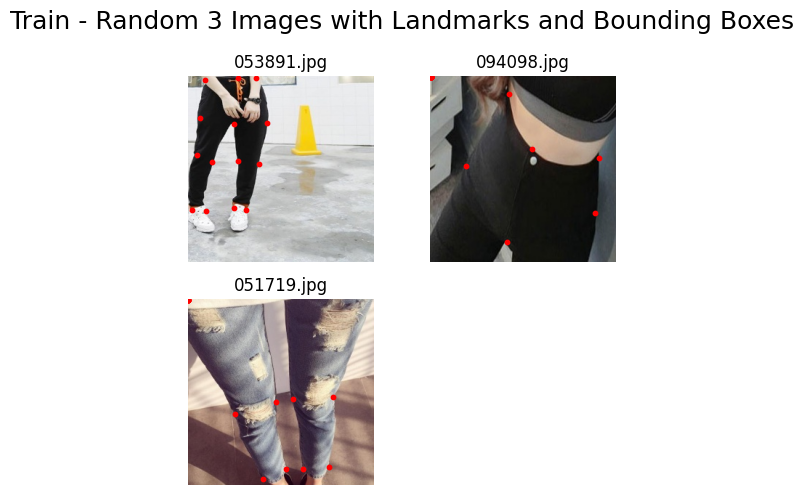

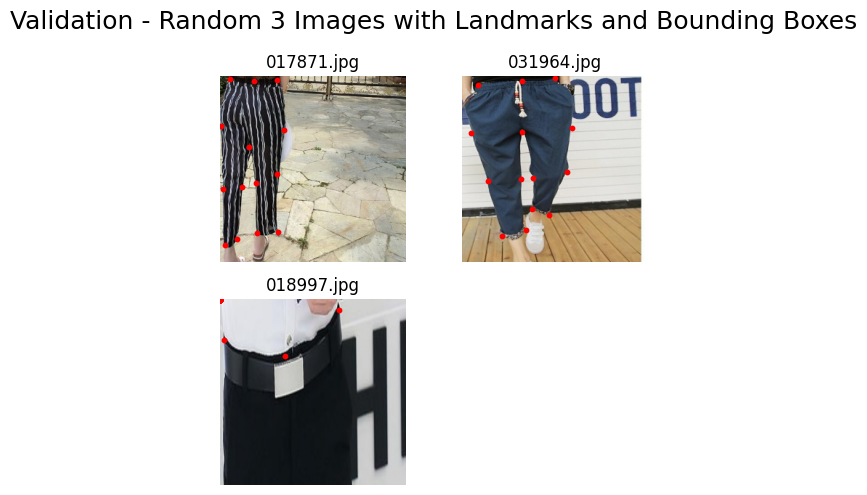

In [ ]:
import os
import json
import random
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Path to your trousers subset
subset_root = "/content/deepfashion2_trousers_subset/Preprocessed_trousers_dataset"

def show_random_images_with_landmarks_and_bbox(split_name, num_images=5):
    image_dir = os.path.join(subset_root, split_name, "image")
    annos_dir = os.path.join(subset_root, split_name, "annos")

    # Get all JSON files
    anno_files = [f for f in os.listdir(annos_dir) if f.endswith(".json")]
    if len(anno_files) < num_images:
        print(f"Not enough images in {split_name} split!")
        return

    # Randomly choose files
    selected_annos = random.sample(anno_files, num_images)

    plt.figure(figsize=(5, 5))
    for i, anno_file in enumerate(selected_annos):
        with open(os.path.join(annos_dir, anno_file), "r") as f:
            data = json.load(f)

        img_path = os.path.join(image_dir, data["image"])
        image = Image.open(img_path)

        # Plot image
        ax = plt.subplot(2, num_images // 2 + num_images % 2, i + 1)
        ax.imshow(image)
        ax.set_title(data["image"])
        ax.axis("off")

        # Plot landmarks
        landmarks = data.get("landmarks", [])
        xs = landmarks[0::3]
        ys = landmarks[1::3]
        vis = landmarks[2::3]

        ax.scatter(xs, ys, c='red', s=10)

        # Plot bounding box if available
        bbox = data.get("b_box", [])
        if bbox and len(bbox) == 4:
            x1, y1, x2, y2 = bbox
            width = x2 - x1
            height = y2 - y1
            rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)

    plt.suptitle(f"{split_name.capitalize()} - Random {num_images} Images with Landmarks and Bounding Boxes", fontsize=18)
    plt.tight_layout()
    plt.show()

# Display 5 random images from each split
show_random_images_with_landmarks_and_bbox("train", 3)
show_random_images_with_landmarks_and_bbox("validation", 3)

# Data Augmentation

In [ ]:
!pip install --upgrade albumentations

In [ ]:
import os
import cv2
import json
import numpy as np
from tqdm import tqdm
import albumentations as A

# Settings
input_root = "/content/deepfashion2_trousers_subset/Preprocessed_trousers_dataset"
output_root = "/content/deepfashion2_trousers_subset/Augmented_trousers_dataset"
target_size = (256, 256)

splits = ["train", "validation"]
num_augmentations = 1  # Only one flip

# Use only horizontal flip
transform = A.Compose(
    [
        A.HorizontalFlip(p=1.0),  # Always apply flip
    ],
    keypoint_params=A.KeypointParams(format='xy', remove_invisible=False)
)

def normalize_image(img):
    return img.astype(np.float32) / 255.0

def apply_augmentations(img, landmarks):
    points = [(landmarks[i], landmarks[i+1]) for i in range(0, len(landmarks), 3)]
    visibility = [landmarks[i+2] for i in range(0, len(landmarks), 3)]

    augmented = transform(image=img, keypoints=points)
    img_aug = augmented['image']
    kps_aug = augmented['keypoints']

    kps_with_v = []
    for i, (x, y) in enumerate(kps_aug):
        kps_with_v.extend([x, y, visibility[i]])

    return img_aug, kps_with_v

for split in splits:
    print(f"\nApplying Horizontal Flip to {split} set...")

    input_img_dir = os.path.join(input_root, split, "image")
    input_anno_dir = os.path.join(input_root, split, "annos")

    out_img_dir = os.path.join(output_root, split, "image")
    out_anno_dir = os.path.join(output_root, split, "annos")
    os.makedirs(out_img_dir, exist_ok=True)
    os.makedirs(out_anno_dir, exist_ok=True)

    for anno_file in tqdm(os.listdir(input_anno_dir)):
        if not anno_file.endswith(".json"):
            continue

        anno_path = os.path.join(input_anno_dir, anno_file)
        with open(anno_path, 'r') as f:
            data = json.load(f)

        img_path = os.path.join(input_img_dir, data["image"])
        if not os.path.exists(img_path):
            print(f"Missing image: {img_path}")
            continue

        img = cv2.imread(img_path)
        if img is None:
            continue

        landmarks = data["landmarks"]
        base_name = os.path.splitext(data["image"])[0]

        # Save original
        output_img_path = os.path.join(out_img_dir, f"{base_name}.jpg")
        cv2.imwrite(output_img_path, (normalize_image(img) * 255).astype(np.uint8))

        output_anno_path = os.path.join(out_anno_dir, f"{base_name}.json")
        with open(output_anno_path, "w") as f_out:
            json.dump({
                "image": f"{base_name}.jpg",
                "landmarks": landmarks,
                "size": target_size
            }, f_out)

        # Save flipped image
        aug_img, aug_landmarks = apply_augmentations(img, landmarks)

        aug_img_name = f"{base_name}_1.jpg"
        aug_anno_name = f"{base_name}_1.json"

        output_img_path = os.path.join(out_img_dir, aug_img_name)
        cv2.imwrite(output_img_path, (normalize_image(aug_img) * 255).astype(np.uint8))

        output_anno_path = os.path.join(out_anno_dir, aug_anno_name)
        with open(output_anno_path, "w") as f_out:
            json.dump({
                "image": aug_img_name,
                "landmarks": aug_landmarks,
                "size": target_size
            }, f_out)



Applying Horizontal Flip to train set...


100%|██████████| 11931/11931 [00:42<00:00, 277.88it/s]



Applying Horizontal Flip to validation set...


100%|██████████| 1114/1114 [00:04<00:00, 276.35it/s]


In [ ]:
import os

output_root = "/content/deepfashion2_trousers_subset/Augmented_trousers_dataset"
splits = ["train", "validation"]

for split in splits:
    images_dir = os.path.join(output_root, split, "image")
    annos_dir = os.path.join(output_root, split, "annos")

    num_images = len([f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    num_annos = len([f for f in os.listdir(annos_dir) if f.lower().endswith('.json')])

    print(f"{split} split:")
    print(f"  Number of images: {num_images}")
    print(f"  Number of annotation files: {num_annos}")
    print()


train split:
  Number of images: 23862
  Number of annotation files: 23862

validation split:
  Number of images: 2228
  Number of annotation files: 2228



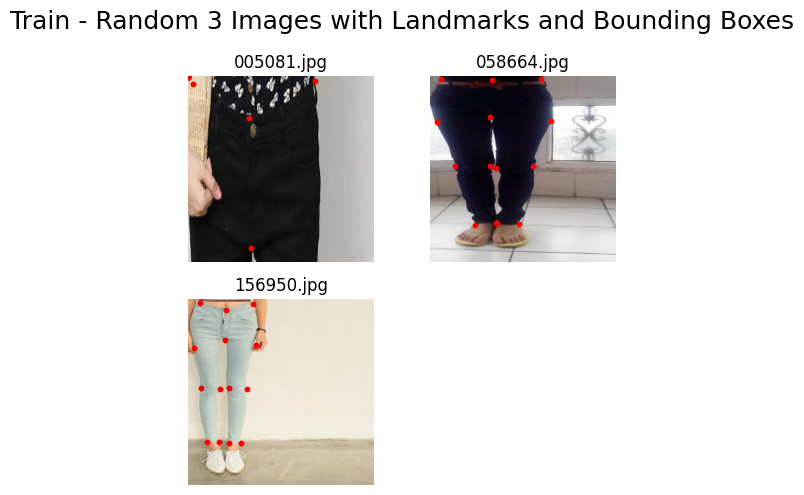

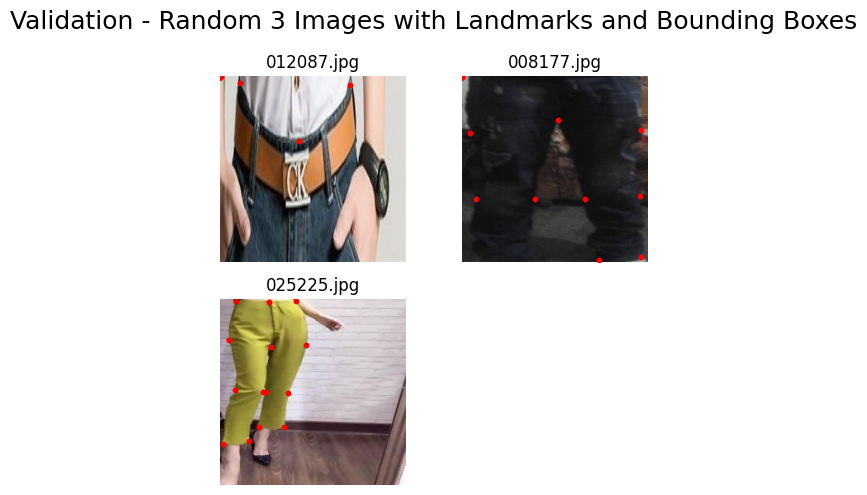

In [ ]:
import os
import json
import random
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Path to your trousers subset
subset_root = "/content/deepfashion2_trousers_subset/Augmented_trousers_dataset"

def show_random_images_with_landmarks_and_bbox(split_name, num_images=5):
    image_dir = os.path.join(subset_root, split_name, "image")
    annos_dir = os.path.join(subset_root, split_name, "annos")

    # Get all JSON files
    anno_files = [f for f in os.listdir(annos_dir) if f.endswith(".json")]
    if len(anno_files) < num_images:
        print(f"Not enough images in {split_name} split!")
        return

    # Randomly choose files
    selected_annos = random.sample(anno_files, num_images)

    plt.figure(figsize=(5, 5))
    for i, anno_file in enumerate(selected_annos):
        with open(os.path.join(annos_dir, anno_file), "r") as f:
            data = json.load(f)

        img_path = os.path.join(image_dir, data["image"])
        image = Image.open(img_path)

        # Plot image
        ax = plt.subplot(2, num_images // 2 + num_images % 2, i + 1)
        ax.imshow(image)
        ax.set_title(data["image"])
        ax.axis("off")

        # Plot landmarks
        landmarks = data.get("landmarks", [])
        xs = landmarks[0::3]
        ys = landmarks[1::3]
        vis = landmarks[2::3]

        ax.scatter(xs, ys, c='red', s=10)

        # Plot bounding box if available
        bbox = data.get("b_box", [])
        if bbox and len(bbox) == 4:
            x1, y1, x2, y2 = bbox
            width = x2 - x1
            height = y2 - y1
            rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)

    plt.suptitle(f"{split_name.capitalize()} - Random {num_images} Images with Landmarks and Bounding Boxes", fontsize=18)
    plt.tight_layout()
    plt.show()

# Display 5 random images from each split
show_random_images_with_landmarks_and_bbox("train", 3)
show_random_images_with_landmarks_and_bbox("validation", 3)

# Data Filtering

In [ ]:
import os
import json
import shutil
from tqdm import tqdm

# Source and target dataset paths
source_root = "/content/deepfashion2_trousers_subset/Augmented_trousers_dataset"
target_root = "/content/deepfashion2_trousers_subset/Complete_Trousers_Dataset"
target_size = (256, 256)  # width, height

splits = ["train", "validation"]

def keypoints_within_bounds(landmarks, width, height):
    for i in range(0, len(landmarks), 3):
        x = landmarks[i]
        y = landmarks[i + 1]
        if x < 0 or x > width or y < 0 or y > height:
            return False
    return True

for split in splits:
    print(f"\nFiltering {split}...")

    src_img_dir = os.path.join(source_root, split, "image")
    src_anno_dir = os.path.join(source_root, split, "annos")

    dst_img_dir = os.path.join(target_root, split, "image")
    dst_anno_dir = os.path.join(target_root, split, "annos")

    os.makedirs(dst_img_dir, exist_ok=True)
    os.makedirs(dst_anno_dir, exist_ok=True)

    kept = 0
    skipped = 0

    for anno_file in tqdm(os.listdir(src_anno_dir)):
        if not anno_file.endswith(".json"):
            continue

        anno_path = os.path.join(src_anno_dir, anno_file)
        with open(anno_path, "r") as f:
            data = json.load(f)

        landmarks = data.get("landmarks", [])
        if len(landmarks) % 3 != 0 or not keypoints_within_bounds(landmarks, target_size[0], target_size[1]):
            skipped += 1
            continue

        # Copy valid annotation and image
        image_name = data.get("image", "").strip()
        src_image_path = os.path.join(src_img_dir, image_name)
        dst_image_path = os.path.join(dst_img_dir, image_name)

        if os.path.exists(src_image_path):
            shutil.copy2(src_image_path, dst_image_path)

        dst_anno_path = os.path.join(dst_anno_dir, anno_file)
        shutil.copy2(anno_path, dst_anno_path)

        kept += 1

    print(f" {split}: Kept {kept} samples | Skipped {skipped} invalid samples")

print("\n Filtering completed. Valid data saved to:", target_root)



Filtering train...


100%|██████████| 23862/23862 [00:11<00:00, 2066.61it/s]


 train: Kept 23683 samples | Skipped 179 invalid samples

Filtering validation...


100%|██████████| 2228/2228 [00:01<00:00, 1520.04it/s]

 validation: Kept 2206 samples | Skipped 22 invalid samples

 Filtering completed. Valid data saved to: /content/deepfashion2_trousers_subset/Complete_Trousers_Dataset


# Data Visualization

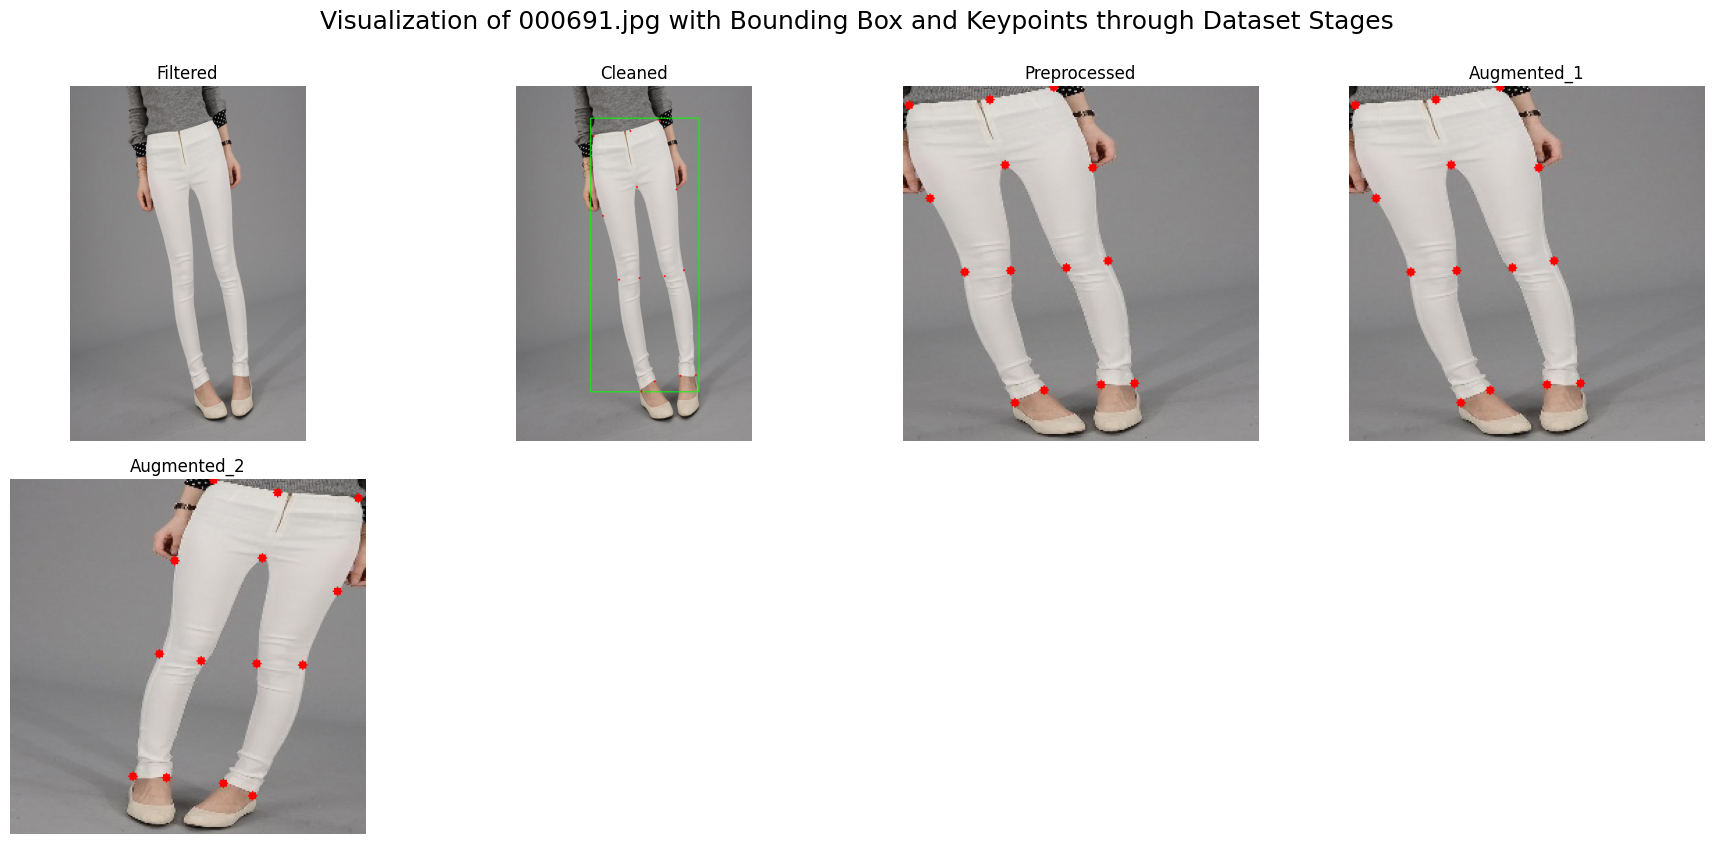

In [ ]:
import cv2
import json
import matplotlib.pyplot as plt
import os

# Define base path
base_path = "/content/deepfashion2_trousers_subset"

# Map each stage to folder and image file
stages = {
    "Filtered":    ("Filtered_Trousers", "000691.jpg"),
    "Cleaned":     ("Cleaned_trousers_dataset", "000691.jpg"),
    "Preprocessed":("Preprocessed_trousers_dataset", "000691.jpg"),
    "Augmented_1": ("Augmented_trousers_dataset", "000691.jpg"),
    "Augmented_2": ("Augmented_trousers_dataset", "000691_1.jpg"),
}

# Plotting
plt.figure(figsize=(18, 8))

for idx, (label, (folder, img_file)) in enumerate(stages.items(), 1):
    img_path = os.path.join(base_path, folder, "train", "image", img_file)
    anno_file = os.path.splitext(img_file)[0] + ".json"
    anno_path = os.path.join(base_path, folder, "train", "annos", anno_file)

    if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        continue
    if not os.path.exists(anno_path):
        print(f"Annotation not found: {anno_path}")
        continue

    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load annotation
    with open(anno_path, "r") as f:
        anno = json.load(f)

    # Draw bounding box if exists
    if "b_box" in anno and len(anno["b_box"]) == 4:
        x1, y1, x2, y2 = map(int, anno["b_box"])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Draw keypoints if exist
    if "landmarks" in anno:
        kps = anno["landmarks"]
        for i in range(0, len(kps), 3):
            x, y, v = kps[i], kps[i+1], kps[i+2]
            if v != 0:  # visibility flag
                cv2.circle(img, (int(x), int(y)), 3, (255, 0, 0), -1)

    # Display
    plt.subplot(2, 4, idx)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")

plt.tight_layout()
plt.suptitle("Visualization of 000691.jpg with Bounding Box and Keypoints through Dataset Stages", fontsize=18, y=1.05)
plt.show()



# Data Analytics

Complete_Trousers_Dataset - validation: 100%|██████████| 2206/2206 [00:00<00:00, 22185.75it/s]


📊 Summary Statistics by Dataset:
                          bbox_width                                       \
                              count        mean         std   min    25%   
dataset                                                                    
Cleaned_trousers_dataset    13045.0  280.120276  115.423592  24.0  197.0   

                                               bbox_height             ...  \
                            50%    75%     max       count       mean  ...   
dataset                                                                ...   
Cleaned_trousers_dataset  256.0  345.0  1048.0     13045.0  465.22936  ...   

                         aspect_ratio           visible_landmarks             \
                                  75%       max             count       mean   
dataset                                                                        
Cleaned_trousers_dataset     0.791946  5.264368           13045.0  11.710847   

                           

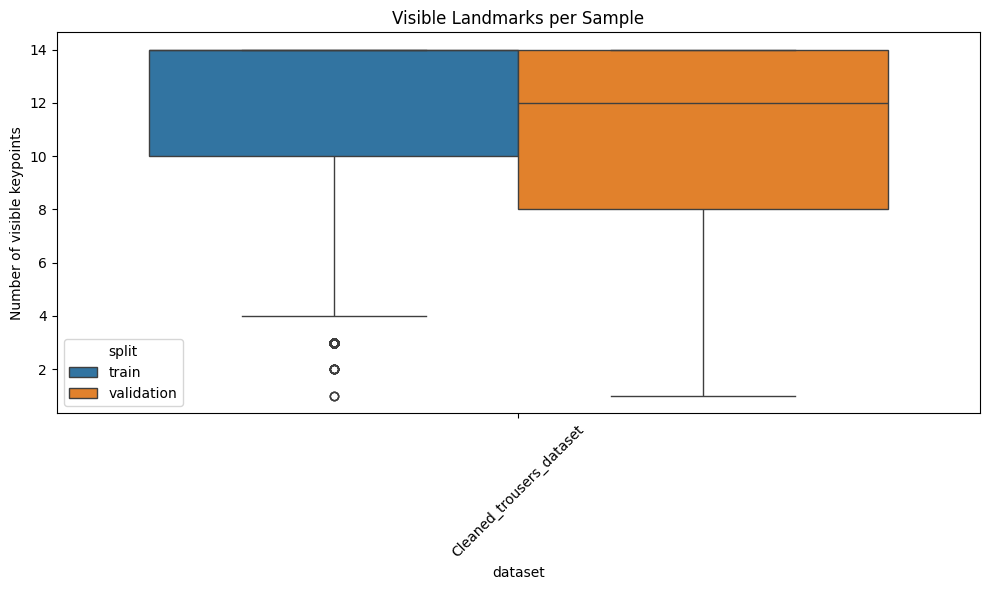

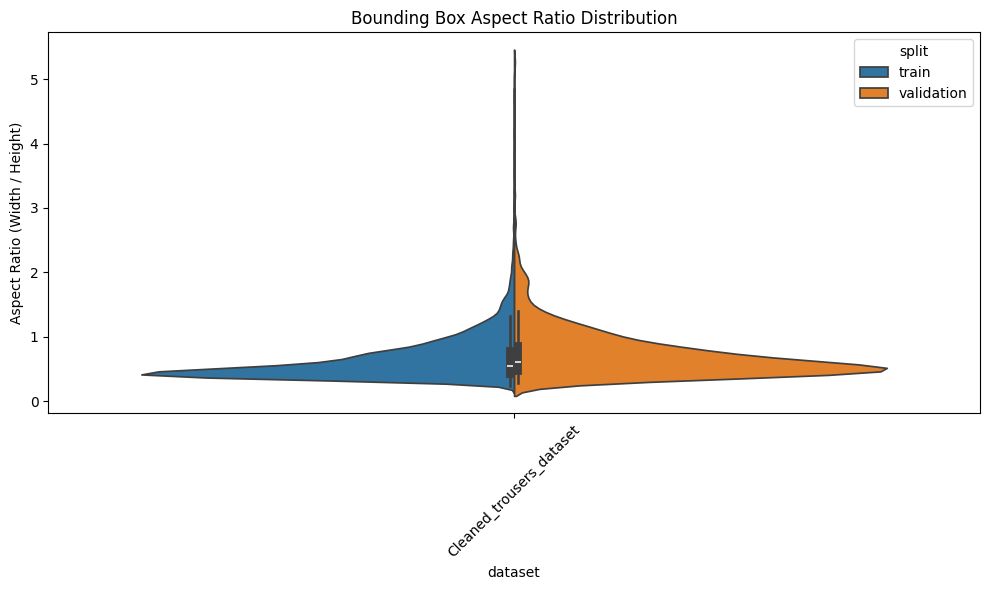

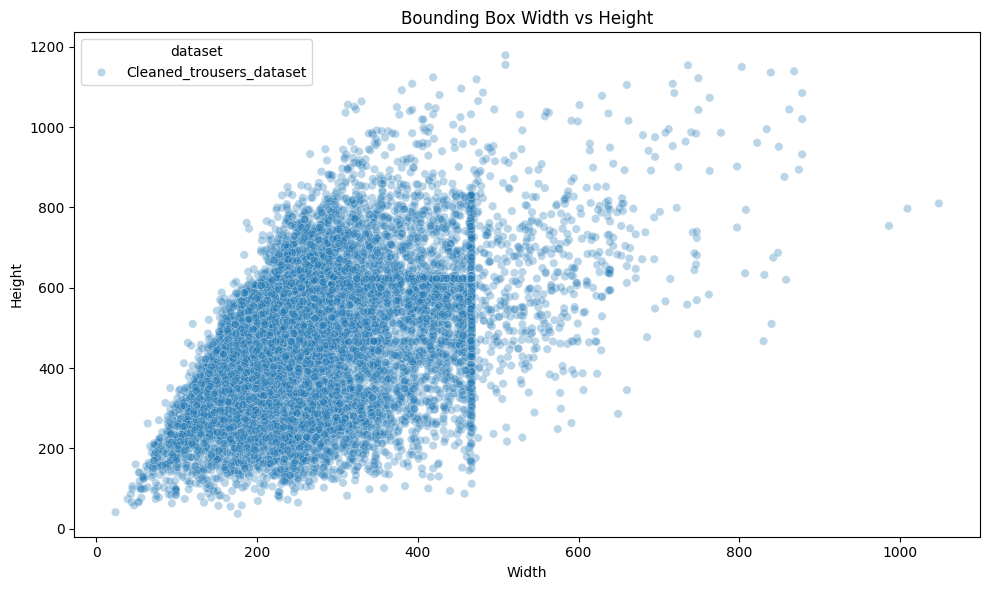

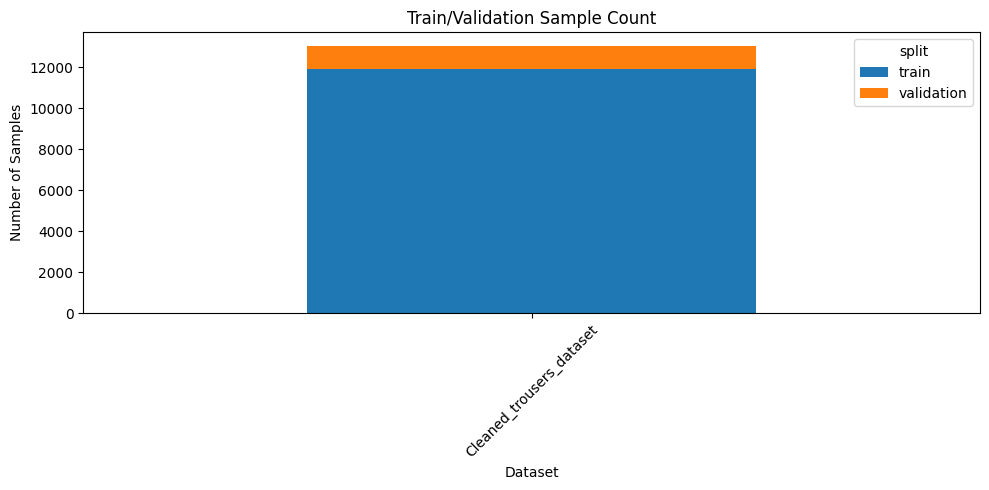

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Required dataset folders
base_root = "/content/deepfashion2_trousers_subset"
dataset_folders = [
    "Filtered_Trousers",
    "Cleaned_trousers_dataset",
    "Preprocessed_trousers_dataset",
    "Augmented_trousers_dataset",
    "Complete_Trousers_Dataset"  # <-- missing comma fixed here
]

all_stats = []

for dataset_name in dataset_folders:
    for split in ["train", "validation"]:
        anno_dir = os.path.join(base_root, dataset_name, split, "annos")
        if not os.path.exists(anno_dir):
            continue

        for file in tqdm(os.listdir(anno_dir), desc=f"{dataset_name} - {split}"):
            if not file.endswith(".json"):
                continue
            try:
                with open(os.path.join(anno_dir, file), 'r') as f:
                    data = json.load(f)

                bbox = data.get("b_box", [])
                if len(bbox) != 4:
                    continue

                x1, y1, x2, y2 = bbox
                w = max(x2 - x1, 1)
                h = max(y2 - y1, 1)
                ar = w / h

                landmarks = data.get("landmarks", [])
                if len(landmarks) % 3 != 0:
                    continue

                vis = landmarks[2::3]
                vis_count = sum([1 for v in vis if v != 0])
                total_kp = len(vis)

                all_stats.append({
                    "dataset": dataset_name,
                    "split": split,
                    "image": data.get("image"),
                    "bbox_width": w,
                    "bbox_height": h,
                    "aspect_ratio": ar,
                    "visible_landmarks": vis_count,
                    "total_landmarks": total_kp
                })
            except Exception as e:
                print(f"Error processing file {file} in {dataset_name} - {split}: {e}")
                continue

# Convert to DataFrame
df = pd.DataFrame(all_stats)

# ----------- Summary Statistics -------------
summary = df.groupby("dataset")[["bbox_width", "bbox_height", "aspect_ratio", "visible_landmarks"]].describe()
print("📊 Summary Statistics by Dataset:\n", summary)

# ----------- Class Distribution -------------
split_dist = df.groupby(["dataset", "split"]).size().unstack(fill_value=0)
print("\n📈 Train/Validation Distribution:\n", split_dist)

# ----------- Landmark Visibility -------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="dataset", y="visible_landmarks", hue="split")
plt.title("Visible Landmarks per Sample")
plt.xticks(rotation=45)
plt.ylabel("Number of visible keypoints")
plt.tight_layout()
plt.show()

# ----------- Bounding Box Aspect Ratio -------------
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="dataset", y="aspect_ratio", hue="split", split=True)
plt.title("Bounding Box Aspect Ratio Distribution")
plt.xticks(rotation=45)
plt.ylabel("Aspect Ratio (Width / Height)")
plt.tight_layout()
plt.show()

# ----------- Bounding Box Sizes -------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="bbox_width", y="bbox_height", hue="dataset", alpha=0.3)
plt.title("Bounding Box Width vs Height")
plt.xlabel("Width")
plt.ylabel("Height")
plt.tight_layout()
plt.show()

# ----------- Dataset Balance Chart -------------
split_dist.plot(kind="bar", stacked=True, figsize=(10, 5), title="Train/Validation Sample Count")
plt.ylabel("Number of Samples")
plt.xlabel("Dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import os
from tabulate import tabulate

# Base directory
base_path = "/content/deepfashion2_trousers_subset"

# Dataset folders to analyze
dataset_folders = [
    "Augmented_trousers_dataset",
    "Cleaned_trousers_dataset",
    "Complete_Trousers_Dataset",
    "Filtered_Trousers",
    "Preprocessed_trousers_dataset"
]

splits = ["train", "validation"]

# Collect statistics
stats = []

for dataset in dataset_folders:
    row = [dataset]
    for split in splits:
        image_dir = os.path.join(base_path, dataset, split, "image")
        if os.path.exists(image_dir):
            count = len([
                f for f in os.listdir(image_dir)
                if f.lower().endswith((".jpg", ".jpeg", ".png"))
            ])
        else:
            count = 0
        row.append(count)
    stats.append(row)

# Display as a table
headers = ["Dataset", "Train Samples", "Validation Samples"]
print(tabulate(stats, headers=headers, tablefmt="github"))


| Dataset                       |   Train Samples |   Validation Samples |
|-------------------------------|-----------------|----------------------|
| Augmented_trousers_dataset    |           23862 |                 2228 |
| Cleaned_trousers_dataset      |           11931 |                 1114 |
| Complete_Trousers_Dataset     |           23683 |                 2206 |
| Filtered_Trousers             |           53644 |                 9118 |
| Preprocessed_trousers_dataset |           11931 |                 1114 |


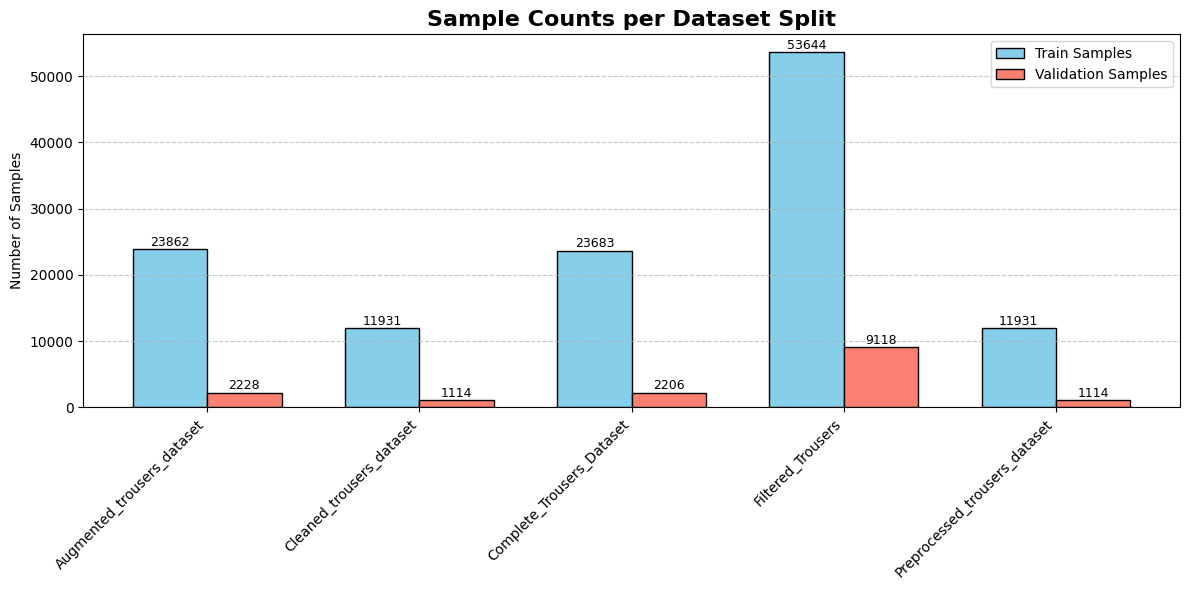

In [ ]:
import matplotlib.pyplot as plt

# Assuming stats is a list like:
# [['Augmented_trousers_dataset', 47724, 4456], ...]
datasets = [row[0] for row in stats]
train_counts = [row[1] for row in stats]
val_counts = [row[2] for row in stats]

# Bar chart
x = range(len(datasets))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, train_counts, width=width, label="Train Samples", color="skyblue", edgecolor="black")
plt.bar([p + width for p in x], val_counts, width=width, label="Validation Samples", color="salmon", edgecolor="black")

# Axis labels and title
plt.xticks([p + width/2 for p in x], datasets, rotation=45, ha="right", fontsize=10)
plt.ylabel("Number of Samples")
plt.title("Sample Counts per Dataset Split", fontsize=16, weight="bold")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add labels on bars
for i, v in enumerate(train_counts):
    plt.text(i, v + 500, str(v), ha='center', fontsize=9)
for i, v in enumerate(val_counts):
    plt.text(i + width, v + 500, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()



# Data Formatting

In [ ]:
import os
import json
from tqdm import tqdm

# Dataset paths
dataset_root = "/content/deepfashion2_trousers_subset/Complete_Trousers_Dataset"
output_json_dir = os.path.join(dataset_root, "coco_format")
os.makedirs(output_json_dir, exist_ok=True)

splits = ["train", "validation"]
target_size = [256, 256]

# Define 14 meaningful keypoint names
keypoint_names = [
    "left_hip", "right_hip",
    "left_knee", "right_knee",
    "left_ankle", "right_ankle",
    "left_pocket", "right_pocket",
    "waist_center", "crotch",
    "left_thigh", "right_thigh",
    "left_hem", "right_hem"
]

num_keypoints = len(keypoint_names)

category = {
    "id": 1,
    "name": "trousers",
    "supercategory": "clothing",
    "keypoints": keypoint_names,
    "skeleton": []
}

for split in splits:
    image_dir = os.path.join(dataset_root, split, "image")
    anno_dir = os.path.join(dataset_root, split, "annos")

    coco_data = {
        "images": [],
        "annotations": [],
        "categories": [category]
    }

    image_id = 1
    annotation_id = 1

    for anno_file in tqdm(os.listdir(anno_dir), desc=f"Formatting {split}"):
        if not anno_file.endswith(".json"):
            continue

        anno_path = os.path.join(anno_dir, anno_file)
        with open(anno_path, "r") as f:
            data = json.load(f)

        file_name = data["image"]
        keypoints = data["landmarks"]

        if len(keypoints) != num_keypoints * 3:
            print(f"Skipping {file_name}: Unexpected number of keypoints ({len(keypoints)})")
            continue

        image_entry = {
            "id": image_id,
            "file_name": os.path.join(image_dir, file_name),
            "height": target_size[1],
            "width": target_size[0]
        }
        coco_data["images"].append(image_entry)

        num_visible = sum(1 for i in range(2, len(keypoints), 3) if keypoints[i] != 0)

        annotation_entry = {
            "id": annotation_id,
            "image_id": image_id,
            "category_id": 1,
            "bbox": [0, 0, target_size[0], target_size[1]],
            "keypoints": keypoints,
            "num_keypoints": num_visible,
            "iscrowd": 0,
            "area": target_size[0] * target_size[1]
        }
        coco_data["annotations"].append(annotation_entry)

        image_id += 1
        annotation_id += 1

    out_path = os.path.join(output_json_dir, f"{split}_coco.json")
    with open(out_path, "w") as out_f:
        json.dump(coco_data, out_f, indent=2)

    print(f"Saved {split}_coco.json to: {out_path}")


Formatting train: 100%|██████████| 23683/23683 [00:01<00:00, 13260.04it/s]


Saved train_coco.json to: /content/deepfashion2_trousers_subset/Complete_Trousers_Dataset/coco_format/train_coco.json


Formatting validation: 100%|██████████| 2206/2206 [00:00<00:00, 5887.62it/s]


Saved validation_coco.json to: /content/deepfashion2_trousers_subset/Complete_Trousers_Dataset/coco_format/validation_coco.json


In [ ]:
import json

json_path = "/content/deepfashion2_trousers_subset/Complete_Trousers_Dataset/coco_format/train_coco.json"
with open(json_path, "r") as f:
    data = json.load(f)

print(f"Images: {len(data['images'])}")
print(f"Annotations: {len(data['annotations'])}")
print(f"Categories: {data['categories']}")

Images: 23683
Annotations: 23683
Categories: [{'id': 1, 'name': 'trousers', 'supercategory': 'clothing', 'keypoints': ['left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle', 'left_pocket', 'right_pocket', 'waist_center', 'crotch', 'left_thigh', 'right_thigh', 'left_hem', 'right_hem'], 'skeleton': []}]


In [ ]:
import json

# Path to your validation COCO JSON file
coco_json_path = "/content/deepfashion2_trousers_subset/Complete_Trousers_Dataset/coco_format/validation_coco.json"

with open(coco_json_path, "r") as f:
    coco_data = json.load(f)

negatives = []

for ann in coco_data["annotations"]:
    keypoints = ann["keypoints"]
    for i in range(0, len(keypoints), 3):
        x = keypoints[i]
        y = keypoints[i + 1]
        if x < 0 or y < 0:
            negatives.append({
                "image_id": ann["image_id"],
                "annotation_id": ann["id"],
                "x": x,
                "y": y
            })
            break  # Skip to next annotation once a negative is found

if negatives:
    print(f"Found {len(negatives)} annotations with negative keypoints.")
    print("Examples:")
    for entry in negatives[:10]:  # Print first 10 for preview
        print(f"  Image ID: {entry['image_id']} | Annotation ID: {entry['annotation_id']} | x: {entry['x']}, y: {entry['y']}")
else:
    print("No negative keypoints found in validation_coco.json.")


No negative keypoints found in validation_coco.json.


# Data Loading

In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-cdy6cwrd
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-cdy6cwrd
  Resolved https://github.com/facebookresearch/detectron2.git to commit 18f69583391e5040043ca4f4bebd2c60f0ebfde0
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.0 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp311-cp311-linux_x86_64.whl size=6052954 sha256=24cdf1a6b501eb4313e713655f45046c47b4a7bf68881424580f8f03224d0b4f
  Stored in directory: /tmp/pip-ephem-wheel-cache-ogbyekif/wheels/17/d9/40/60db98e485aa9455

In [ ]:
import torch, torchvision, numpy, detectron2
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("NumPy:", numpy.__version__)
print("Detectron2:  OK")

Torch: 2.6.0+cu124
Torchvision: 0.21.0+cu124
NumPy: 2.0.2
Detectron2:  OK


In [ ]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog

# Update these paths based on your setup
train_json = "/content/deepfashion2_trousers_subset/Complete_Trousers_Dataset/coco_format/train_coco.json"
train_img_dir = "/content/deepfashion2_trousers_subset/Complete_Trousers_Dataset/train/image"

val_json = "/content/deepfashion2_trousers_subset/Complete_Trousers_Dataset/coco_format/validation_coco.json"
val_img_dir = "/content/deepfashion2_trousers_subset/Complete_Trousers_Dataset/validation/image"

# Step 1: Register the datasets with Detectron2
register_coco_instances("trousers_train", {}, train_json, train_img_dir)
register_coco_instances("trousers_val", {}, val_json, val_img_dir)

# Step 2: Manually set the class names
MetadataCatalog.get("trousers_train").thing_classes = ["trousers"]
MetadataCatalog.get("trousers_val").thing_classes = ["trousers"]

# Optional: Verify
train_metadata = MetadataCatalog.get("trousers_train")
val_metadata = MetadataCatalog.get("trousers_val")

print("Datasets registered successfully.")
print("Train categories:", train_metadata.thing_classes)


Datasets registered successfully.
Train categories: ['trousers']


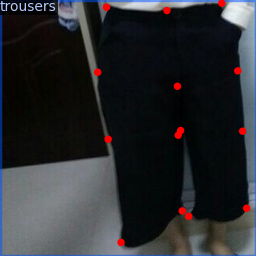

In [ ]:
import random
import cv2
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load a sample
dataset_dicts = DatasetCatalog.get("trousers_train")
metadata = MetadataCatalog.get("trousers_train")

# Pick one random image to display
sample = random.choice(dataset_dicts)

# Load the image
img = cv2.imread(sample["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=1.0)
out = visualizer.draw_dataset_dict(sample)
# Use cv2_imshow instead of cv2.imshow
cv2_imshow(out.get_image()[:, :, ::-1])

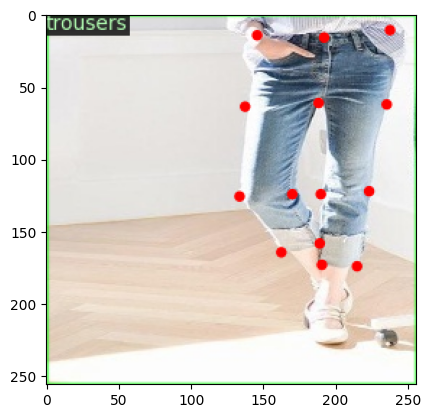

In [ ]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog
import cv2
import random
import matplotlib.pyplot as plt

dataset_dicts = DatasetCatalog.get("trousers_train")
sample = random.choice(dataset_dicts)
img = cv2.imread(sample["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=1.0)
out = visualizer.draw_dataset_dict(sample)
plt.imshow(out.get_image())
plt.show()

# Data Management

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -r /content/deepfashion2_trousers_subset/Complete_Trousers_Dataset.zip /content/deepfashion2_trousers_subset/Complete_Trousers_Dataset

In [ ]:
!mkdir -p /content/drive/MyDrive/deepfashion2_trousers_subset

In [ ]:
!cp /content/deepfashion2_trousers_subset/Complete_Trousers_Dataset.zip /content/drive/MyDrive/deepfashion2_trousers_subset/

In [ ]:
!cp /content/drive/MyDrive/deepfashion2_trousers_subset/Complete_Trousers_Dataset.zip /content/